In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import glob
%matplotlib inline

In [2]:
dog_train_list = []
for img in glob.glob("C:/Users/Pushkar Khetrapal/Desktop/workshop/training_set/dogs/*.jpg"):
    cv_img = cv2.imread(img)
    cv_img = cv2.resize(cv_img,(64,64))

    dog_train_list.append(cv_img)
print(len(cv_img))
print(len(dog_train_list))
#print(l)
dog_train_img = np.array(dog_train_list)
print(dog_train_img.shape)

64
4000
(4000, 64, 64, 3)


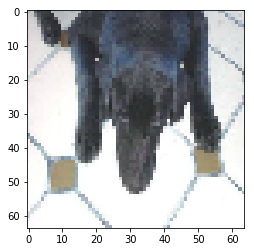

In [49]:
index = 3090
plt.imshow(dog_train_img[index])

In [3]:
dog_test_list = []
for img in glob.glob("C:/Users/Pushkar Khetrapal/Desktop/workshop/test_set/dogs/*.jpg"):
    cv_img_1 = cv2.imread(img)
    cv_img_1 = cv2.resize(cv_img_1,(64,64))

    dog_test_list.append(cv_img_1)
print(len(cv_img_1))
print(len(dog_test_list))
#print(l)
dog_test_img = np.array(dog_test_list)
print(dog_test_img.shape)

64
1000
(1000, 64, 64, 3)


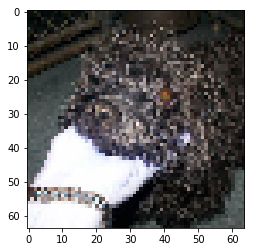

In [4]:
index = 302
plt.imshow(dog_test_img[index])

In [5]:
cat_train_list = []
for img in glob.glob("C:/Users/Pushkar Khetrapal/Desktop/workshop/training_set/cats/*.jpg"):
    cv_img_2 = cv2.imread(img)
    cv_img_2 = cv2.resize(cv_img_2,(64,64))

    cat_train_list.append(cv_img_2)
print(len(cv_img_2))
print(len(cat_train_list))
#print(l)
cat_train_img = np.array(cat_train_list)
print(cat_train_img.shape)

64
4000
(4000, 64, 64, 3)


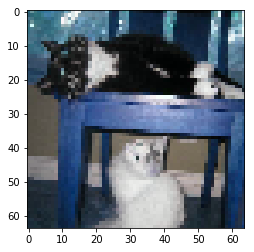

In [6]:
index = 3090
plt.imshow(cat_train_img[index])

In [7]:
cat_test_list = []
for img in glob.glob("C:/Users/Pushkar Khetrapal/Desktop/workshop/test_set/cats/*.jpg"):
    cv_img_3 = cv2.imread(img)
    cv_img_3 = cv2.resize(cv_img_3,(64,64))

    cat_test_list.append(cv_img_3)
print(len(cv_img_3))
print(len(cat_test_list))
#print(l)
cat_test_img = np.array(cat_test_list)
print(cat_test_img.shape)

64
1000
(1000, 64, 64, 3)


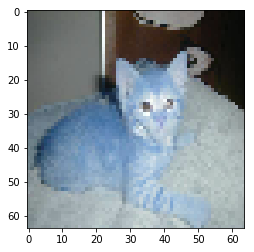

In [8]:
index = 309
plt.imshow(cat_test_img[index])

In [9]:
print ("train_set_x shape: " + str(dog_train_img.shape))
print ("train_set_y shape: " + str(cat_train_img.shape))
print ("test_set_x shape: " + str(dog_test_img.shape))
print ("test_set_y shape: " + str(cat_test_img.shape))

train_set_x shape: (4000, 64, 64, 3)
train_set_y shape: (4000, 64, 64, 3)
test_set_x shape: (1000, 64, 64, 3)
test_set_y shape: (1000, 64, 64, 3)


In [10]:
dog_train_y = np.ones((1,4000))
cat_train_y = np.zeros((1,4000))
dog_test_y = np.ones((1,1000))
cat_test_y = np.zeros((1,1000))

In [11]:
y_train = np.concatenate((dog_train_y,cat_train_y),axis=1)
y_train

array([[1., 1., 1., ..., 0., 0., 0.]])

In [12]:
x_train = np.concatenate((dog_train_img,cat_train_img),axis=0)
x_train.shape

(8000, 64, 64, 3)

In [13]:
x_test = np.concatenate((dog_test_img,cat_test_img),axis=0)
x_test.shape

y_test = np.concatenate((dog_test_y,cat_test_y),axis=1)
y_test.shape

(1, 2000)

In [14]:
y_test

array([[1., 1., 1., ..., 0., 0., 0.]])

In [18]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)

x_train_flat = x_train.reshape(x_train.shape[0], -1).T
x_test_flat = x_test.reshape(x_test.shape[0], -1).T

### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(x_train_flat.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(x_test_flat.shape))
print ("test_set_y shape: " + str(y_test.shape))
#print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 8000)
train_set_y shape: (1, 8000)
test_set_x_flatten shape: (12288, 2000)
test_set_y shape: (1, 2000)


In [19]:
x_train = x_train_flat/255
x_test = x_test_flat/255
x_train.shape

(12288, 8000)

In [20]:
x_train
x_test
y_train
y_test
x_train

array([[0.29019608, 0.22745098, 0.69803922, ..., 0.69411765, 0.93333333,
        0.43529412],
       [0.40392157, 0.43921569, 0.72156863, ..., 0.71764706, 0.90196078,
        0.54509804],
       [0.53333333, 0.55294118, 0.76470588, ..., 0.76862745, 0.92941176,
        0.79607843],
       ...,
       [0.83921569, 0.31764706, 0.20784314, ..., 0.41960784, 0.86666667,
        0.47058824],
       [0.9254902 , 0.36470588, 0.24313725, ..., 0.41568627, 0.89803922,
        0.48627451],
       [0.91764706, 0.38823529, 0.31764706, ..., 0.41176471, 0.9254902 ,
        0.59215686]])

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [21]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [22]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [23]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
     # FORWARD PROPAGATION (FROM X TO COST)
    z = np.dot(w.T, X)+b # tag 1
    A = sigmoid(z) # tag 2                                    
    cost = (-np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m # tag 5
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (np.dot(X,(A-Y).T))/m # tag 6
    db = np.average(A-Y) # tag 7
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### d) Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [24]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []    
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update w and b
        w = w - learning_rate*dw
        b = b - learning_rate*db
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # update w and b to dictionary
    params = {"w": w,
              "b": b}
    
    # update derivatives to dictionary
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [25]:
def predict(w, b, X):    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            return True
        else: 
            return False

In [26]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
	# initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    dict = {"costs": costs,
            "Y_prediction_test": Y_prediction_test,
            "Y_prediction_train": Y_prediction_train,
            "w": w,
            "b": b,
            "learning_rate": learning_rate,
            "num_iterations:": num_iterations}
    
    return dict

In [27]:
d = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.344805
Cost after iteration 200: 1.296958
Cost after iteration 300: 1.267128
Cost after iteration 400: 1.246178
Cost after iteration 500: 1.230194
Cost after iteration 600: 1.217309
Cost after iteration 700: 1.206531
Cost after iteration 800: 1.197267
Cost after iteration 900: 1.189126
Cost after iteration 1000: 1.181838
Cost after iteration 1100: 1.175208
Cost after iteration 1200: 1.169098
Cost after iteration 1300: 1.163404
Cost after iteration 1400: 1.158049
Cost after iteration 1500: 1.152974
Cost after iteration 1600: 1.148133
Cost after iteration 1700: 1.143491
Cost after iteration 1800: 1.139019
Cost after iteration 1900: 1.134696
train accuracy: 50.0 %
test accuracy: 50.0 %


In [40]:
test_image = cv2.imread("download.jpg")
test_image = cv2.resize(test_image, (256,256))
test = test_image.reshape(x_train.shape[0], -1).T
my_predicted_image = predict(d["w"], d["b"], x_train)
print(np.squeeze(my_predicted_image))

False


# Logistic Regression with sklearn library

In [28]:
x_train_sk = x_train.T
x_train_sk.shape

(8000, 12288)

In [29]:
x_test_sk = x_test.T
y_train_sk = y_train.reshape(8000,)
y_test_sk = y_test.reshape(2000,)
print(x_test_sk.shape)
print(y_train_sk.shape)
print(y_test_sk.shape)

(2000, 12288)
(8000,)
(2000,)


In [30]:
#### paste here #################
from sklearn.linear_model import LogisticRegression



In [31]:
##### paste here ##################
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_sk, y_train_sk)




c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#### paste here ###################
y_pred_logic = classifier.predict(x_test_sk)


In [33]:
### paste here ##################

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sk, y_pred_logic)


In [34]:
cm

array([[585, 415],
       [476, 524]], dtype=int64)

# Decision Tree Classifier

In [35]:
### paste here ###################

from sklearn.tree import DecisionTreeClassifier

In [36]:
### paste here #########################

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_sk, y_train_sk)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [37]:
### paste here ################################
y_pred_dec_tree = classifier.predict(x_test_sk)



In [38]:
### paste here ###############################
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sk, y_pred_dec_tree)



In [39]:
cm

array([[568, 432],
       [472, 528]], dtype=int64)

# Random Forest classifier

In [40]:
### paste here #############################
from sklearn.ensemble import RandomForestClassifier



In [47]:
### paste here ####################################

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_sk, y_train_sk)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
### paste here ################################
y_pred_ran_for = classifier.predict(x_test_sk)




In [49]:
######### paste here ########################
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sk, y_pred_ran_for)



In [50]:
cm

array([[724, 276],
       [493, 507]], dtype=int64)